# Preprocessing

In [24]:
import os
import cv2         #computer vision module to load and open images
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
mnist = tf.keras.datasets.mnist      
#mnist is a dataset present in keras which consists of different handwritten samples
#this data is already validated in train data and testing data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [27]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

# Training Model

In [28]:
model = tf.keras.models.Sequential()    #basic neural network model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))       #28x28 taken as mnist datasets have 28x28 pixels
#Flatten layer converts the inputs (2d) into a 1d vector
model.add(tf.keras.layers.Dense(128,activation='relu'))    #relu ---> Rectified Linear Activation Function
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))   #softmax ---> Acts on probablities

In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2661 - accuracy: 0.9222
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1074 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0737 - accuracy: 0.9770


In [31]:
model.save('handwritten.model')

In [32]:
model = tf.keras.models.load_model('handwritten.model')

# Testing Model

In [33]:
loss,accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9720
0.09189704060554504
0.972000002861023


# Giving Random Data

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
%cd /content/gdrive/MyDrive/Machine Learning/HANDWRITTEN DIGIT RECOGNITION/TESTING DATA/

/content/gdrive/MyDrive/Machine Learning/HANDWRITTEN DIGIT RECOGNITION/TESTING DATA


1/1 [==============================] - 0s 22ms/step
This digit is probably a 2


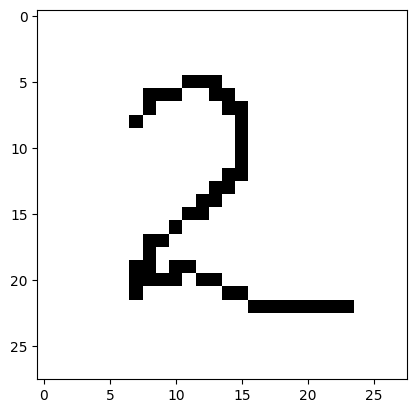

1/1 [==============================] - 0s 25ms/step
This digit is probably a 7


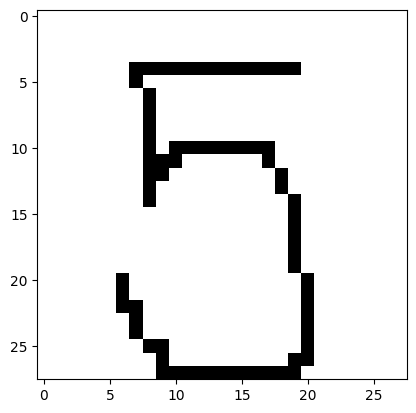

1/1 [==============================] - 0s 23ms/step
This digit is probably a 5


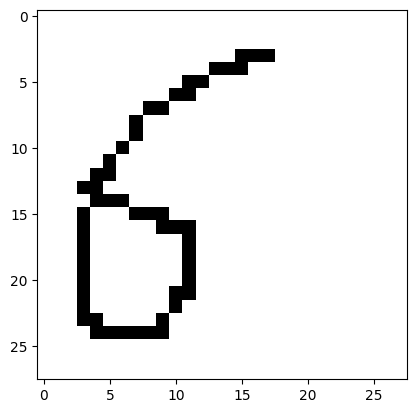

1/1 [==============================] - 0s 22ms/step
This digit is probably a 3


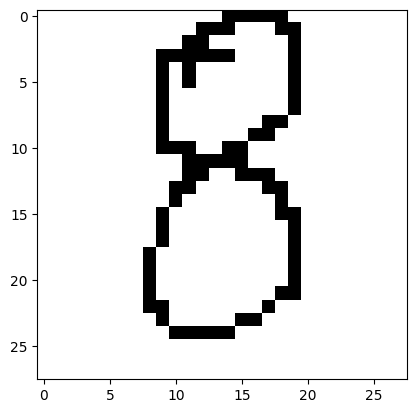

1/1 [==============================] - 0s 23ms/step
This digit is probably a 3


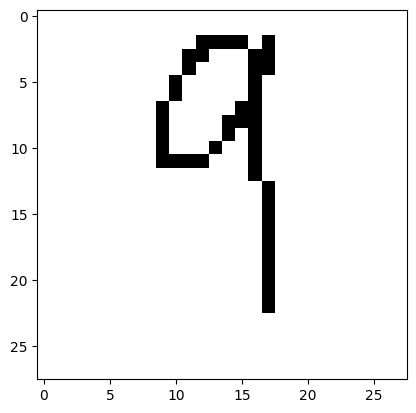

1/1 [==============================] - 0s 24ms/step
This digit is probably a 1


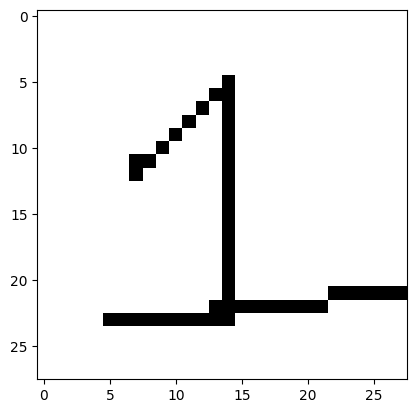

1/1 [==============================] - 0s 29ms/step
This digit is probably a 9


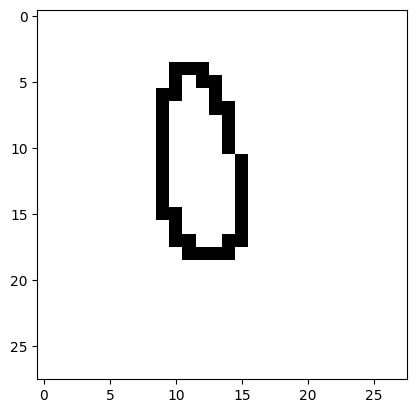

1/1 [==============================] - 0s 24ms/step
This digit is probably a 2


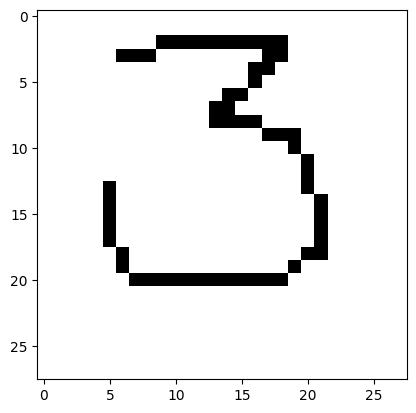

1/1 [==============================] - 0s 25ms/step
This digit is probably a 1


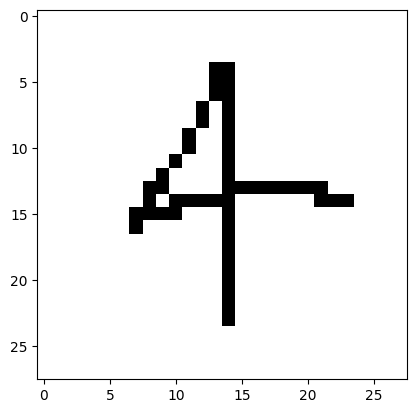

1/1 [==============================] - 0s 27ms/step
This digit is probably a 4


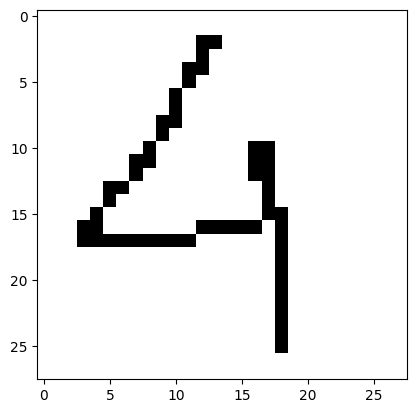

1/1 [==============================] - 0s 23ms/step
This digit is probably a 3


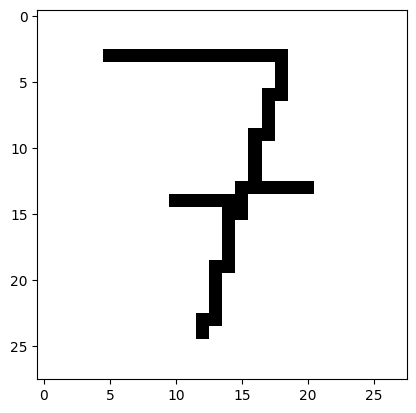

1/1 [==============================] - 0s 25ms/step
This digit is probably a 3


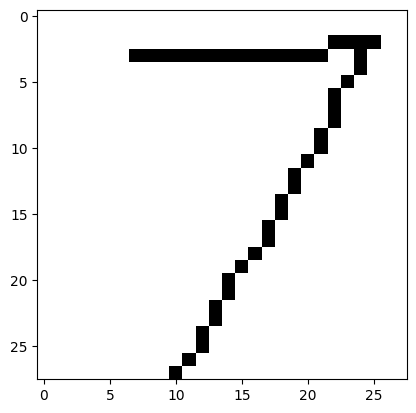

1/1 [==============================] - 0s 28ms/step
This digit is probably a 3


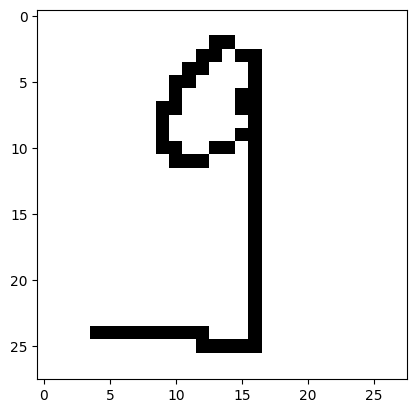

In [37]:
image_num = 1
while os.path.isfile(f"digit_image{image_num}.png"):
  try:
    image = cv2.imread(f"digit_image{image_num}.png")[:,:,0]
    image = np.invert(np.array([image]))
    prediction = model.predict(image)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(image[0],cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!!!")
  finally:
    image_num += 1